# Injection-recovery test ($\Delta\log_{10}\text{BF}$ Vs $e_0$)

In [1]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import fsolve

## Fetching data 


In [2]:
# TaylorF2Ecck 
# e0=0.01
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p01 = result.log_10_bayes_factor
# e0=0.03
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p03_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p03 = result.log_10_bayes_factor
# e0=0.04
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p04_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p04 = result.log_10_bayes_factor
# e0=0.05
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p05_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p05 = result.log_10_bayes_factor
# e0=0.10
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p10_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p10 = result.log_10_bayes_factor
# e0=0.20
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecck_recovery_e0_0p20_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecck_0p20 = result.log_10_bayes_factor
print(ecck_0p01, ecck_0p03, ecck_0p04, ecck_0p10, ecck_0p20)

# TaylorF2Ecc 
# e0=0.01
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecc_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecc_0p01 = result.log_10_bayes_factor
# e0=0.04
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecc_recovery_e0_0p04_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecc_0p04 = result.log_10_bayes_factor
# e0=0.10
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecc_recovery_e0_0p10_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecc_0p10 = result.log_10_bayes_factor
# e0=0.20
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecc_recovery_e0_0p20_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecc_0p20 = result.log_10_bayes_factor
print(ecc_0p01, ecc_0p04, ecc_0p10, ecc_0p20)

# TaylorF2Ecch
# e0=0.01
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecch_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecch_0p01 = result.log_10_bayes_factor
# e0=0.03
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecch_recovery_e0_0p03_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecch_0p03 = result.log_10_bayes_factor
# e0=0.10
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecch_recovery_e0_0p10_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecch_0p10 = result.log_10_bayes_factor
# e0=0.20
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_Ecch_recovery_e0_0p20_data0_1126259642-413_analysis_H1L1_result.hdf5")
ecch_0p20 = result.log_10_bayes_factor
print(ecch_0p01, ecch_0p03, ecch_0p10, ecch_0p20)

# TaylorF2
# e0=0.01
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_tf2_recovery_e0_0p01_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p01 = result.log_10_bayes_factor
# e0=0.05
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_tf2_recovery_e0_0p05_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p05 = result.log_10_bayes_factor
# e0=0.10
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_tf2_recovery_e0_0p1_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p1 = result.log_10_bayes_factor
# e0=0.20
result = bilby.result.read_in_result("../injection_recover_PE_results/Ecck_injection_tf2_recovery_e0_0p2_data0_1126259642-413_analysis_H1L1_result.hdf5")
tf2_0p2 = result.log_10_bayes_factor
print(tf2_0p01, tf2_0p05, tf2_0p1, tf2_0p2)

883.0499329593875 882.6294092710854 882.4575931031466 891.4348482415795 921.4493345684718
883.2586865615903 882.3833637234353 882.1072948654913 881.7765526849169
883.1539478568565 882.6181457693157 882.1875829312771 840.1336630350506
882.8545296980002 557.5472264376909 240.4959639422672 -53.286027000756185


In [3]:
# TaylorF2Ecck vs TaylorF2Ecch
bf_ecch = np.array([ecck_0p01-ecch_0p01, ecck_0p03-ecch_0p03, ecck_0p10-ecch_0p10, ecck_0p20-ecch_0p20])
e0_ecch = np.array([0.01, 0.03, 0.1, 0.2])

# TaylorF2Ecck vs Ecc
bf_ecc = np.array([ecck_0p01-ecc_0p01, ecck_0p04-ecc_0p04, ecck_0p10-ecc_0p10, ecck_0p20-ecc_0p20])
e0_ecc = np.array([0.01, 0.04, 0.1, 0.2])

# TaylorF2Ecck vs TaylorF2
bf_tf2 = np.array([ecck_0p01-tf2_0p01, ecck_0p05-tf2_0p05, ecck_0p10-tf2_0p1, ecck_0p20-tf2_0p2])
e0_tf2 = np.array([0.01, 0.05, 0.1, 0.2])
bf_ecch, bf_ecc, bf_tf2

(array([-1.04014897e-01,  1.12635018e-02,  9.24726531e+00,  8.13156715e+01]),
 array([-0.2087536 ,  0.07422938,  9.32755338, 39.67278188]),
 array([1.95403261e-01, 3.24810672e+02, 6.50938884e+02, 9.74735362e+02]))

In [4]:
# curve fitting
# fit spline
cs_ecch = CubicSpline(e0_ecch, bf_ecch, extrapolate=True)
e0_spline_ecch = fsolve(lambda x: cs_ecch(x) - 2, 0.05)[0]
print(f"e0 spline at bf = 2: {e0_spline_ecch}")

# fit spline
cs_ecc = CubicSpline(e0_ecc, bf_ecc, extrapolate=True)
e0_spline_ecc = fsolve(lambda x: cs_ecc(x) - 2, 0.05)[0]
print(f"e0 spline at bf = 2: {e0_spline_ecc}")

# TaylorF2Ecck vs TaylorF2
cs_tf2 = CubicSpline(e0_tf2, bf_tf2, extrapolate=True)
e0_spline_tf2 = fsolve(lambda x: cs_tf2(x) - 2, 0.05)[0]
print(f"e0 spline at bf = 2: {e0_spline_tf2}")

e0 spline at bf = 2: 0.06343430093628923
e0 spline at bf = 2: 0.05989096722356119
e0 spline at bf = 2: 0.010206459720858277


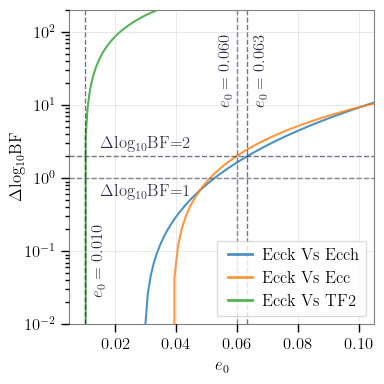

In [6]:
e0_array = np.geomspace(0.01, 0.22, 100)
e0_array2 = np.geomspace(0.001, 0.22, 100)

# Setup the figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})
plt.figure(figsize=(4, 4))
plt.plot(e0_array, cs_ecch(e0_array), label='Ecck Vs Ecch', color='C0', alpha=0.8)
plt.plot(e0_array, cs_ecc(e0_array), label='Ecck Vs Ecc', color='C1', alpha=0.8)
plt.plot(e0_array2, cs_tf2(e0_array2), label='Ecck Vs TF2', color='C2', alpha=0.8)

# Labeling the first plot
plt.xlabel(r"$e_0$", fontdict={'fontsize': 12})
plt.ylabel(r'$\Delta$log$_{10}$BF', labelpad=0, fontdict={'fontsize': 12})

legend = plt.legend(handlelength=2, loc='lower right', bbox_to_anchor=(1.0, 0.0), frameon=True, fontsize=12, edgecolor='lightgray')
# # rounded box for legend
legend.get_frame().set_boxstyle('Round', pad=0.0, rounding_size=0.2)
# Modify line width for legend entries
for handle in legend.get_lines():
    handle.set_linewidth(2)
    handle.set_alpha(0.8)

# horizontal lines
plt.axhline(y=2.0, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(0.015, 2.0+0.5, r'$\Delta$log$_{10}$BF=2', color='#1B1833', fontsize=12, alpha=0.9)
plt.axhline(y=1.0, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(0.015, 1.0-0.45, r'$\Delta$log$_{10}$BF=1', color='#1B1833', fontsize=12, alpha=0.9)

# vertical lines
plt.axvline(x=e0_spline_tf2, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(e0_spline_tf2+0.002, 0.025, rf'$e_0={e0_spline_tf2:.3f}$', color='#1B1833', fontsize=12, alpha=0.9, rotation=90)
plt.axvline(x=e0_spline_ecch, color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(e0_spline_ecch+0.002, 10, rf'$e_0={e0_spline_ecch:.3f}$', color='#1B1833', fontsize=12, alpha=0.9, rotation=90)
plt.axvline(x=e0_spline_ecc , color='#1B1833', linestyle='--', linewidth=1, alpha=0.6)
plt.text(e0_spline_ecc-0.006, 10, rf'$e_0={e0_spline_ecc:.3f}$', color='#1B1833', fontsize=12, alpha=0.9, rotation=90)

plt.xlim(0.005, 0.105)
plt.ylim(0.01, 200.0)
plt.yscale('log')

plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('./bf_vs_eccn.pdf')
plt.show()